In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# TEAM NOTE:
# Before running any code, make sure to:
# 1. Mount your Google Drive
# 2. Verify BASE_PATH is correct for your Drive



In [4]:
# ===============================
#   SETUP CELL - Run this first
# ===============================
from google.colab import drive
drive.mount('/content/drive')

# Base path for project
BASE_PATH = '/content/drive/MyDrive/Land_Classification_Project/dataset /EuroSAT_RGB/EuroSAT_RGB'

import os
if os.path.exists(BASE_PATH):
    print("✅ Drive connected and project path found!")
else:
    print("⚠️ Please check the project folder path.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Drive connected and project path found!


In [5]:
import os

path = '/content/drive/MyDrive/Land_Classification_Project/dataset /EuroSAT_RGB/EuroSAT_RGB'
print(os.path.exists(path))


True


In [6]:
base_path = '/content/drive/MyDrive/Land_Classification_Project/dataset /EuroSAT_RGB/EuroSAT_RGB'

classes = os.listdir(base_path)
print("Classes:", classes)


Classes: ['SeaLake', 'River', 'Residential', 'PermanentCrop', 'Pasture', 'Industrial', 'Forest', 'HerbaceousVegetation', 'AnnualCrop', 'Highway']


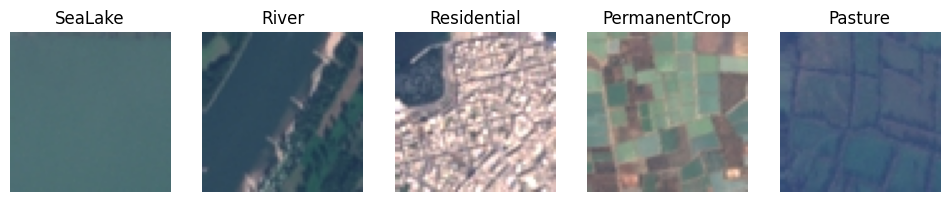

In [7]:
import os
import matplotlib.pyplot as plt
import random
import cv2

base_path = base_path
classes = os.listdir(base_path)

plt.figure(figsize=(12,8))
for i, cls in enumerate(classes[:5]):  # اعرض أول 5 classes
    img_path = os.path.join(base_path, cls, random.choice(os.listdir(os.path.join(base_path, cls))))
    img = plt.imread(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()


{'SeaLake': 3000, 'River': 2500, 'Residential': 3000, 'PermanentCrop': 2500, 'Pasture': 2000, 'Industrial': 2500, 'Forest': 3000, 'HerbaceousVegetation': 3000, 'AnnualCrop': 3000, 'Highway': 2500}


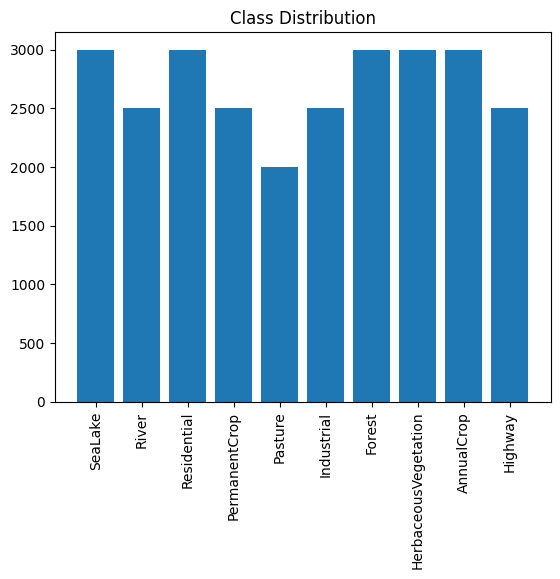

In [8]:
from collections import Counter

counts = {cls: len(os.listdir(os.path.join(base_path, cls))) for cls in classes}
print(counts)
plt.bar(counts.keys(), counts.values())
plt.xticks(rotation=90)
plt.title('Class Distribution')
plt.show()


In [9]:
import numpy as np
from tensorflow.keras.utils import to_categorical

IMG_SIZE = (64, 64)
X, y = [], []

for idx, cls in enumerate(classes):
    folder = os.path.join(base_path, cls)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, IMG_SIZE)
        X.append(img)
        y.append(idx)

X = np.array(X) / 255.0  # Normalize
y = to_categorical(y, num_classes=len(classes))


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


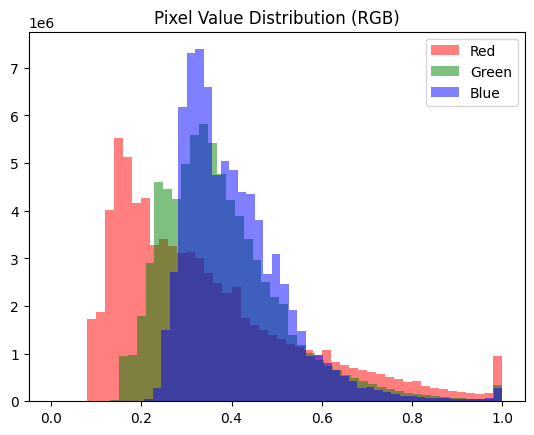

In [12]:
plt.hist(X_train[:,:,:,0].ravel(), bins=50, color='r', alpha=0.5, label='Red')
plt.hist(X_train[:,:,:,1].ravel(), bins=50, color='g', alpha=0.5, label='Green')
plt.hist(X_train[:,:,:,2].ravel(), bins=50, color='b', alpha=0.5, label='Blue')
plt.legend()
plt.title('Pixel Value Distribution (RGB)')
plt.show()
